In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
df =df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<Axes: xlabel='bill_length_mm', ylabel='Count'>

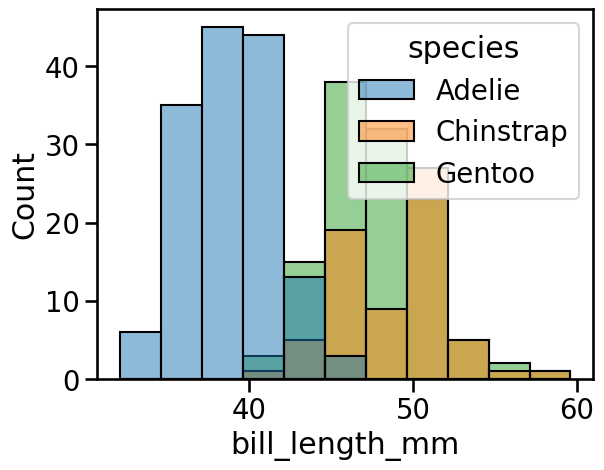

In [ ]:
sns.histplot(data=df, x="bill_length_mm", hue='species')

In [ ]:
df.groupby('species').mean()

<ipython-input-64-5d1673ab2e43>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('species').mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


In [ ]:
X = df[['bill_length_mm','bill_depth_mm']]
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [ ]:
X_mc = (X-X.mean())/(X.std())
X_mc.head()

,bill_length_mm,bill_depth_mm
0,-0.894695,0.779559
1,-0.821552,0.119404
2,-0.675264,0.424091
4,-1.333559,1.084246
5,-0.858123,1.744400


In [ ]:
Y = df[['flipper_length_mm','body_mass_g']]
Y.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0


In [ ]:
Y_mc = (Y-Y.mean())/(Y.std())
Y_mc.head()

,flipper_length_mm,body_mass_g
0,-1.424608,-0.567621
1,-1.067867,-0.505525
2,-0.425733,-1.188572
4,-0.568429,-0.940192
5,-0.782474,-0.691811


In [ ]:
from sklearn.cross_decomposition import CCA


In [ ]:
ca = CCA(n_components=2)
ca.fit(X_mc, Y_mc)
X_c, Y_c = ca.transform(X_mc, Y_mc)

In [ ]:
ca.get_params()

{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}

In [ ]:
ca.x_weights_

array([[ 0.77117071,  0.63662841],
       [-0.63662841,  0.77117071]])

In [ ]:
ca.x_loadings_

array([[ 0.74865652,  0.63662841],
       [-0.66390065,  0.77117071]])

In [ ]:
ca.x_rotations_

array([[ 0.77117071,  0.66390065],
       [-0.63662841,  0.74865652]])

In [ ]:
ca.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 0.80778876,  1.34803699],
       [-0.63191572,  0.18340716]])

In [ ]:
Y_hat = X_mc @ ca.x_rotations_

In [ ]:
ca.x_rotations_

array([[ 0.77117071,  0.66390065],
       [-0.63662841,  0.74865652]])

In [ ]:
ca.y_rotations_

array([[ 0.99963688, -0.88745256],
       [-0.02694639,  1.02428558]])

In [ ]:
Y_hat

,0,1
0,-1.186252,-0.010367
1,-0.709573,-0.456036
2,-0.790732,-0.130809
4,-1.718663,-0.073623
5,-1.772295,0.736248
...,...,...
338,1.572414,-0.927902
340,1.322035,-0.748356
341,1.377092,0.220933
342,0.934766,-0.752510


In [ ]:
cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "Species":df.species.tolist(),
                      "Island":df.island.tolist(),
                      "sex":df.sex.tolist()})

In [ ]:
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,Species,Island,sex
0,-1.186252,-1.408795,-0.010367,0.682866,Adelie,Torgersen,MALE
1,-0.709573,-1.053857,-0.456036,0.429879,Adelie,Torgersen,FEMALE
2,-0.790732,-0.393550,-0.130809,-0.839620,Adelie,Torgersen,FEMALE
3,-1.718663,-0.542888,-0.073623,-0.458571,Adelie,Torgersen,FEMALE
4,-1.772295,-0.763548,0.736248,-0.014204,Adelie,Torgersen,MALE


In [ ]:
import numpy as np
np.corrcoef(Y_c[:, 0], Y_c[:, 1])

array([[ 1.00000000e+00, -1.42603801e-15],
       [-1.42603801e-15,  1.00000000e+00]])

<Axes: xlabel='CCX_1', ylabel='CCY_1'>

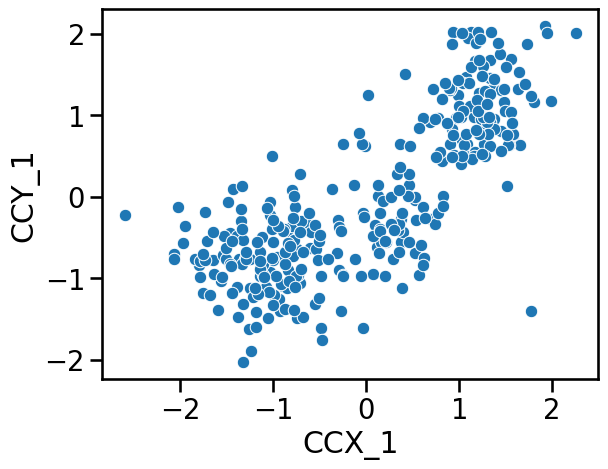

In [ ]:
import seaborn as sns
import matplotlib as plt
sns.set_context("talk", font_scale=1.2)
sns.scatterplot(x="CCX_1",
                y="CCY_1",
                data=cc_res)

In [ ]:
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
y = df['flipper_length_mm']

In [ ]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6202523002022253

In [ ]:
reg.coef_

array([ 1.40891962, -3.21782338])

In [ ]:
sns.scatterplot(x="CCX_1",
                y="CCY_1",
                data=cc_res)

In [ ]:
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,Species,Island,sex
0,-1.186252,-1.408795,-0.010367,0.682866,Adelie,Torgersen,MALE
1,-0.709573,-1.053857,-0.456036,0.429879,Adelie,Torgersen,FEMALE
2,-0.790732,-0.393550,-0.130809,-0.839620,Adelie,Torgersen,FEMALE
3,-1.718663,-0.542888,-0.073623,-0.458571,Adelie,Torgersen,FEMALE
4,-1.772295,-0.763548,0.736248,-0.014204,Adelie,Torgersen,MALE


In [ ]:
cc_res.corr()

<ipython-input-83-8efd7ae711f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cc_res.corr()


,CCX_1,CCY_1,CCX_2,CCY_2
CCX_1,1.000000e+00,7.876315e-01,2.504132e-16,-1.005825e-15
CCY_1,7.876315e-01,1.000000e+00,-1.663021e-07,-1.415754e-15
CCX_2,2.504132e-16,-1.663021e-07,1.000000e+00,8.638695e-02
CCY_2,-1.005825e-15,-1.415754e-15,8.638695e-02,1.000000e+00


In [ ]:
X_ = cc_res[['CCX_1', 'CCX_2']]
y_ = cc_res['CCY_1']
reg = LinearRegression().fit(X_, y_)
reg.score(X_, y_)

0.6203634023041735

In [ ]:
X_ = cc_res[['CCX_1']]
y_ = cc_res['CCY_1']
reg = LinearRegression().fit(X_, y_)
reg.score(X_, y_)

0.6203634023041735